In [2]:
using Flux, Flux.Data.MNIST, Images
using Flux: onehotbatch, argmax, crossentropy, throttle
using Base.Iterators: repeated, partition

In [3]:
gpu(x) = x
# using CuArrays
# gpu(x) = cu(x)

gpu (generic function with 1 method)

,,,,,,,,,

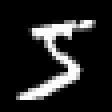
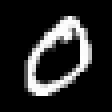
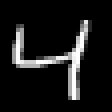
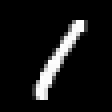
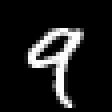
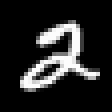
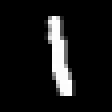
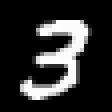
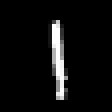
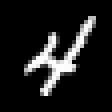

In [4]:
imgs = MNIST.images()

labels = gpu(collect(onehotbatch(MNIST.labels(), 0:9)))

imgs[1:10]

In [12]:
# Partition into batches of size 1,000
train = [(gpu(hcat(float.(vec.(imgs[i]))...)), labels[:,i])
         for i in partition(1:60_000, 1000)]

# Prepare test set (first 1,000 images)
tX = gpu(hcat(vec.(float.(MNIST.images(:test)[1:1000]))...))
tY = gpu(onehotbatch(MNIST.labels(:test)[1:1000], 0:9));

In [6]:
m = Chain(
  Dense(28^2, 32, relu),
  Dense(32, 10),
  softmax)

m = gpu(m)

loss(x, y) = crossentropy(m(x), y)

loss (generic function with 1 method)

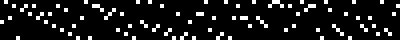

In [7]:
Gray.(collect(labels[:,1:100]))

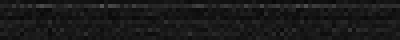

In [8]:
Gray.(collect(m(train[1][1]).data)[:,1:100])

In [9]:
evalcb = () -> display(Gray.(collect(m(train[1][1]).data)[:,1:100]))

(::#5) (generic function with 1 method)

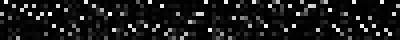

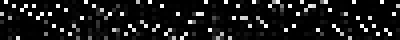

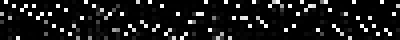

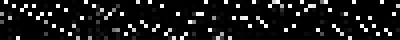

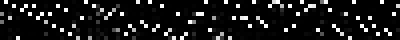

In [10]:
for i = 1:5
    Flux.train!(loss, train, ADAM(params(m)))
    evalcb()
end

Test set accuracy.

In [13]:
mean(argmax(m(tX)) .== argmax(tY))

0.916